<a href="https://colab.research.google.com/github/AswinAsh369/ML_Projects/blob/main/PRJ_10_Rossmann_Retail_Sales_Predication_ML_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Rossmann Retail Sales Prediction**



**Project Summary**

This dataset is a live dataset of Rossmann Stores. On analsysing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Project I have worked on the following topics:

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis.

By applying above algorthim we find accuracy of 88% by GradientBoostingRegressor.

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
Data Description
Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores
Data fields
Most of the fields are self-explanatory.
Id - an Id that represents a (Store, Da,,te) duple within the set
Store - a unique Id for each store
Sales - the turnover for any given day (Dependent Variable)
Customers - the number of customers on a given day

# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Rosmann Data
sales_df =pd.read_csv('/content/Rossmann Stores Data (1).csv')
# Store data
store_df =pd.read_csv('/content/store (1).csv')

<ipython-input-2-851c223736c5>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv('/content/Rossmann Stores Data (1).csv')


In [3]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [98]:
sales_df.shape

(1017209, 9)

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# count of stateholidays
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [9]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'] .unique()

array([1, 0])

In [12]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(sales_df[i].unique())
  print("-----------------------")


DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [14]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [15]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)



In [16]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [17]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [18]:
final1 = pd.merge(sales_df, store_df, on='Store', how='left')

In [19]:
final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [20]:
final1.duplicated().sum()

0

In [21]:
#Change data types object to int
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

In [22]:
# change Data Types object into int
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

In [23]:
# change Data Types object into int
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

In [24]:
print(final1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [25]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [26]:
 final1["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [27]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [28]:
# code for change object into date format
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [29]:
# code for change float into integer
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)


In [30]:
# code for change float into integer
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

In [31]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [32]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [97]:
final1.shape

(1017209, 18)

In [33]:
final1.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Sales

**Line chart**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

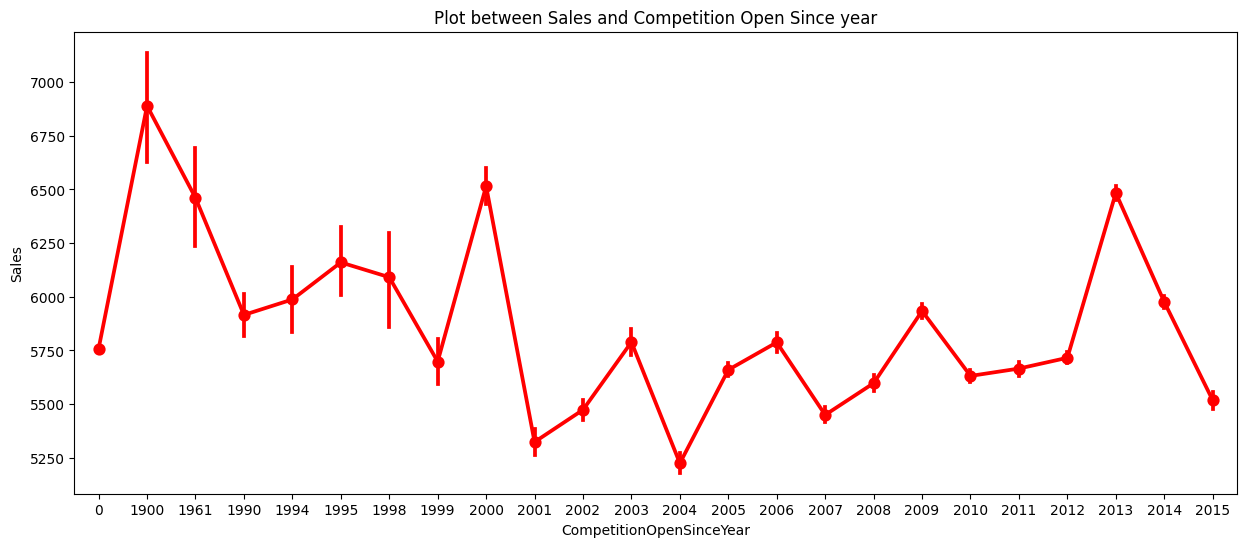

In [84]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')


**From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.**

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

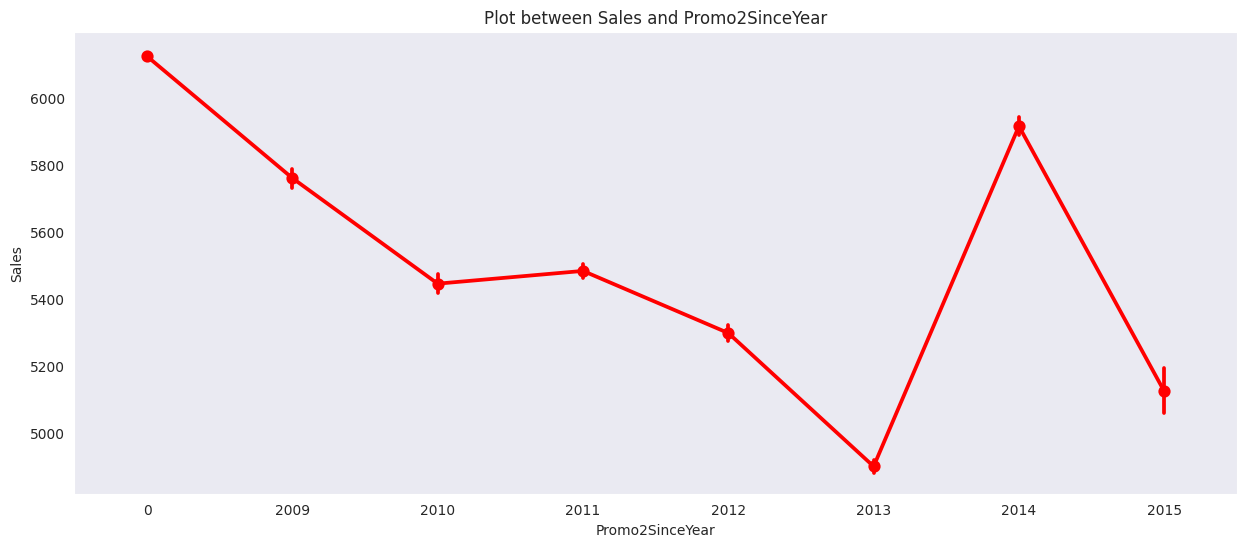

In [85]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')



**From This Graph We saw that sales of  stores  is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.**

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

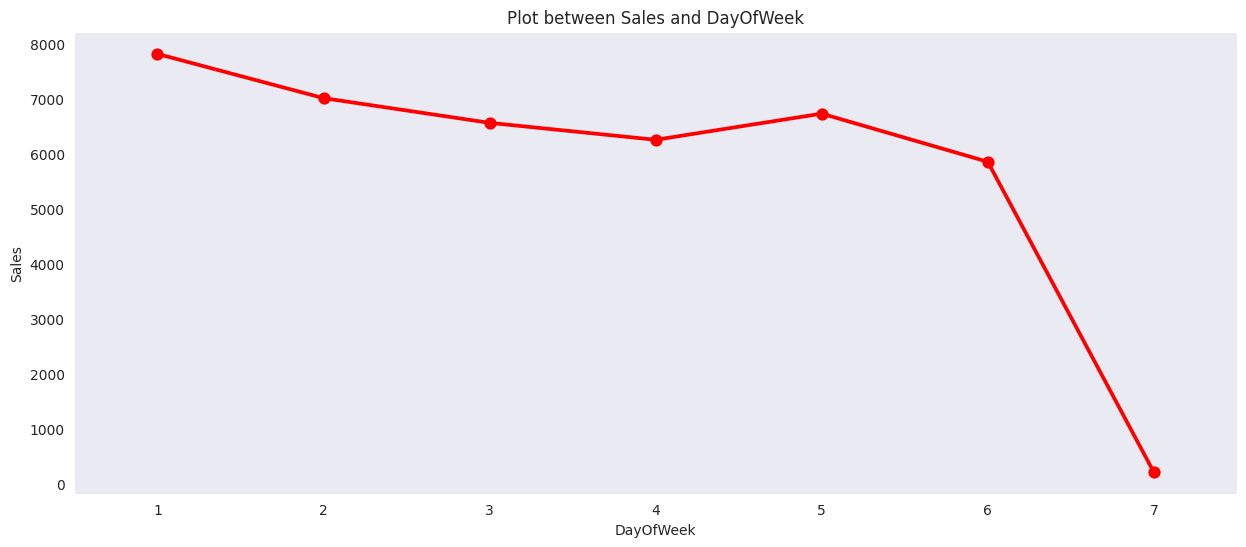

In [86]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')


**From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same  is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday ,so the Sales is closed to Zero.**


Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

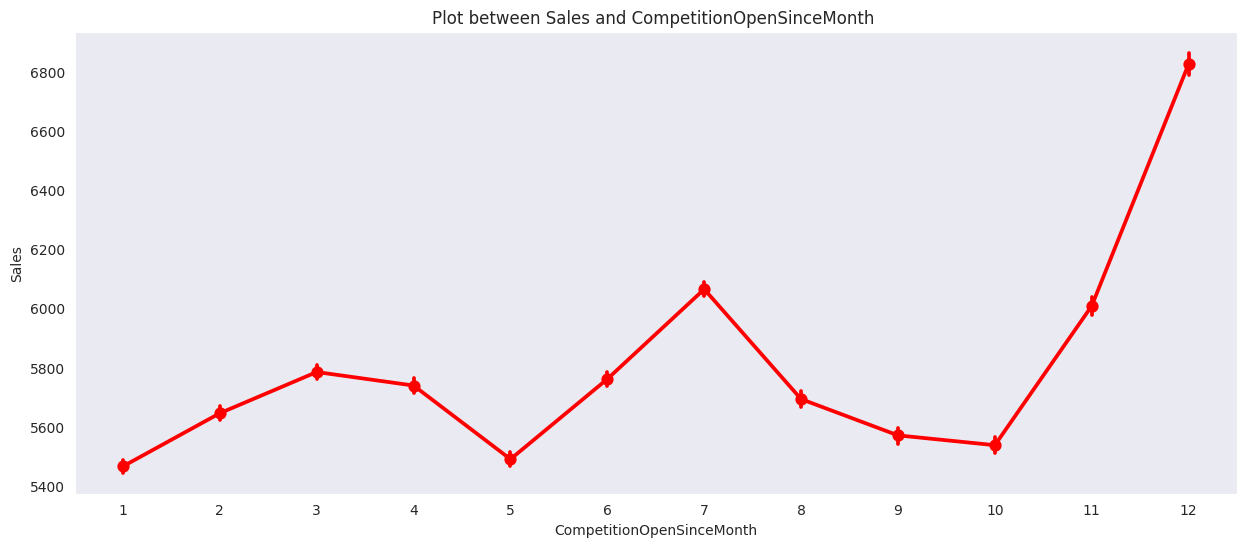

In [87]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

Text(0.5, 1.0, 'Store Daily Open Countplot')

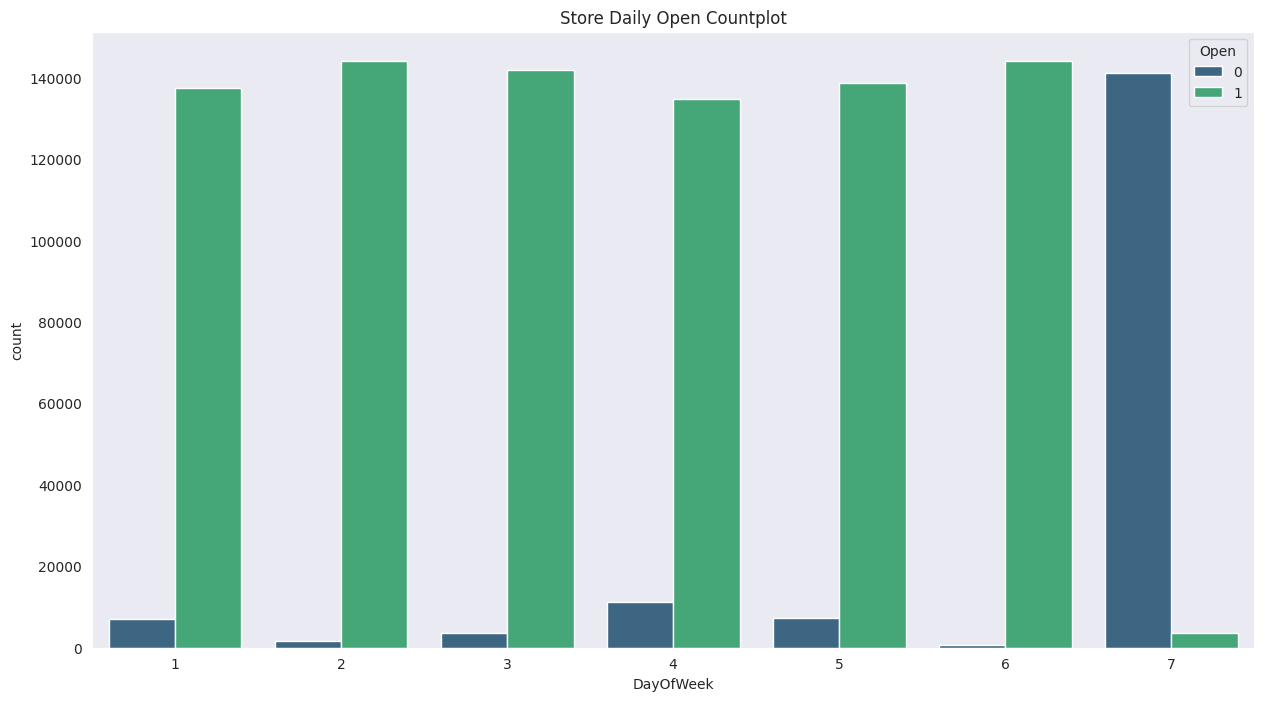

In [88]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='viridis')
plt.title('Store Daily Open Countplot')


Text(0.5, 1.0, 'Store Daily Promo Countplot')

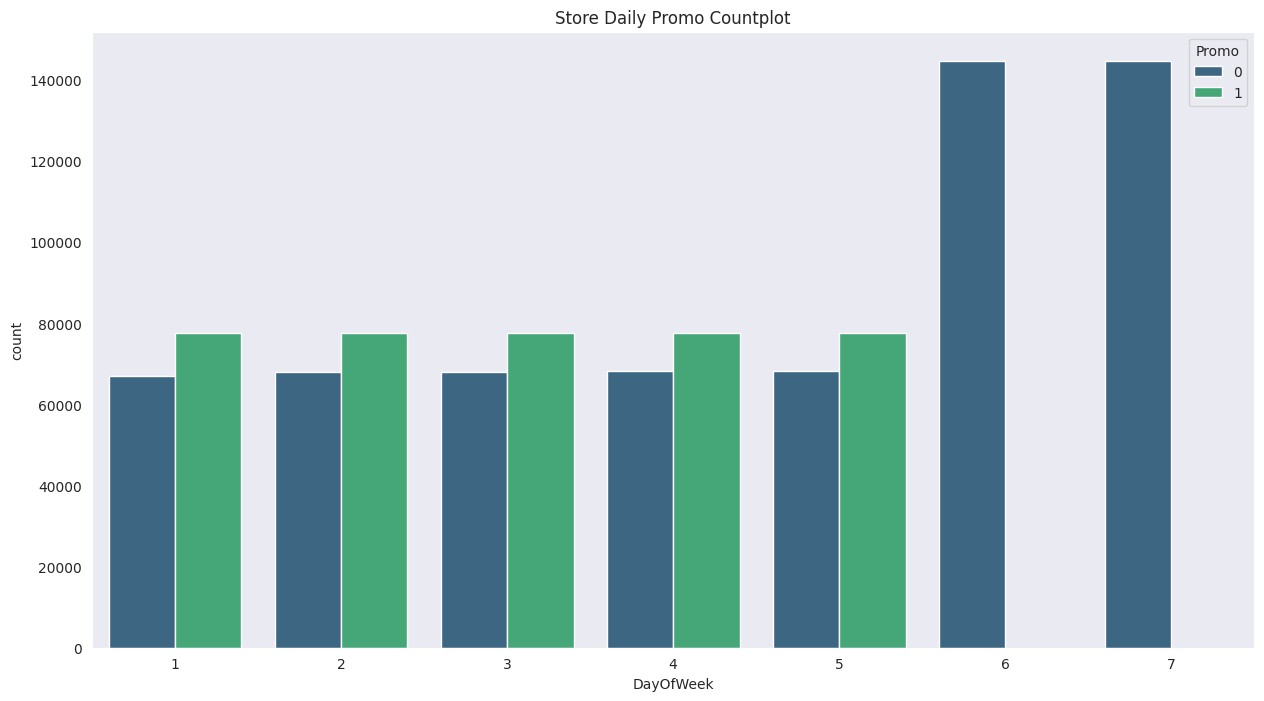

In [89]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='viridis')
plt.title('Store Daily Promo Countplot')

<ipython-input-90-adb5ea573f59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='viridis')


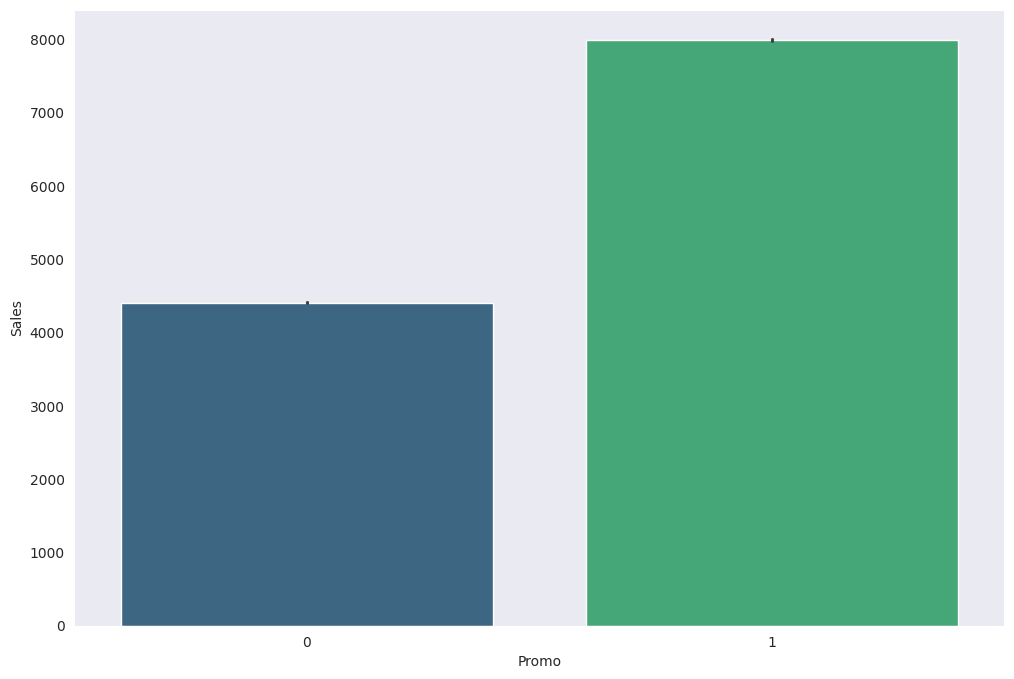

In [90]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='viridis')

**Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.**

## **State Holiday**

**0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None**

<ipython-input-91-15751be57a84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1,palette='viridis')


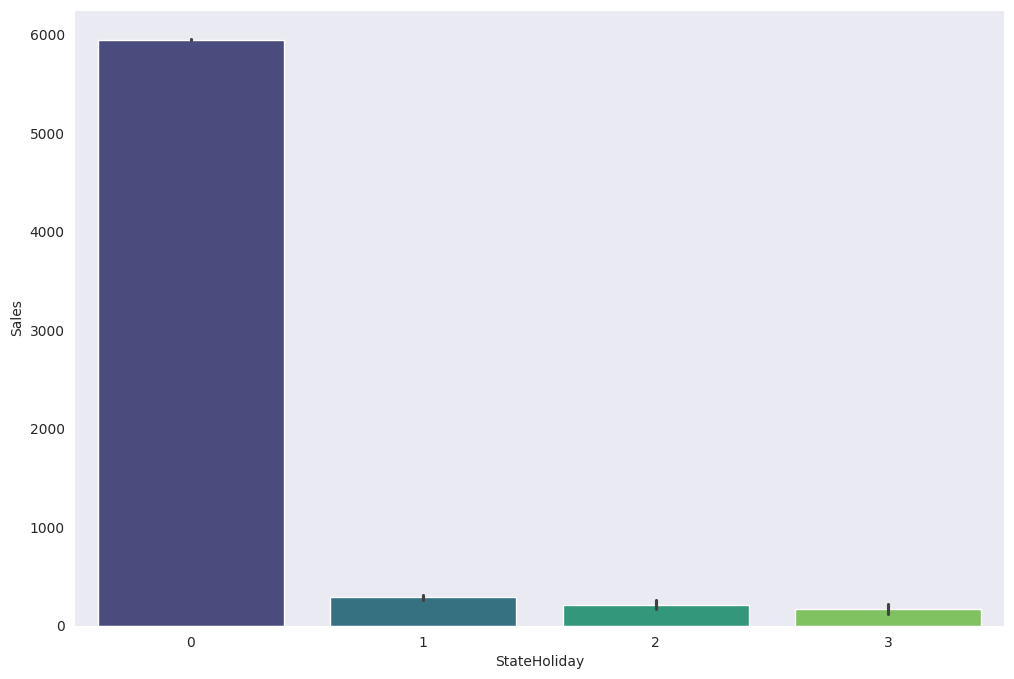

In [91]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1,palette='viridis')

## **School Holiday**

**0='Not Holiday', 1='Holiday'**

<ipython-input-92-c31a9e9c9134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1,palette='viridis')


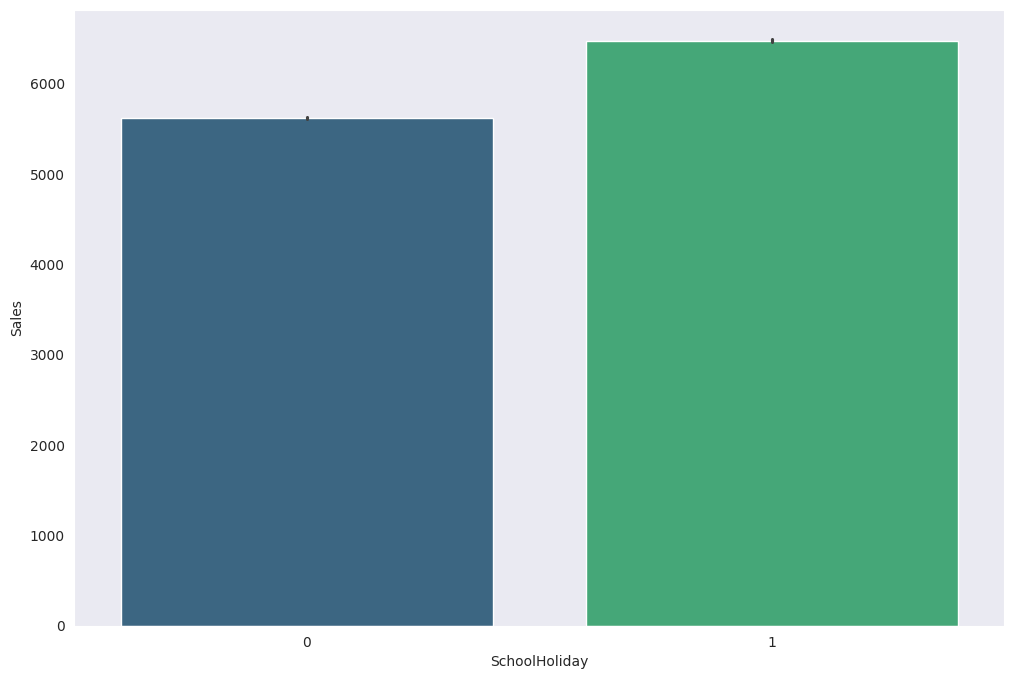

In [92]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1,palette='viridis')

**We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.**

# **Conclusion of EDA**



1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.

2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.

4)Type of Store plays an important role in opening pattern of stores.

5)All Type ‘b’ stores never closed except for refurbishment or other reason.

6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.

7)Assortment Level ‘b’ is only offered at Store Type ‘b’.


8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

# **6-Feature Engineering & Data Pre-processing**

<ipython-input-34-d5bf9bfc42bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

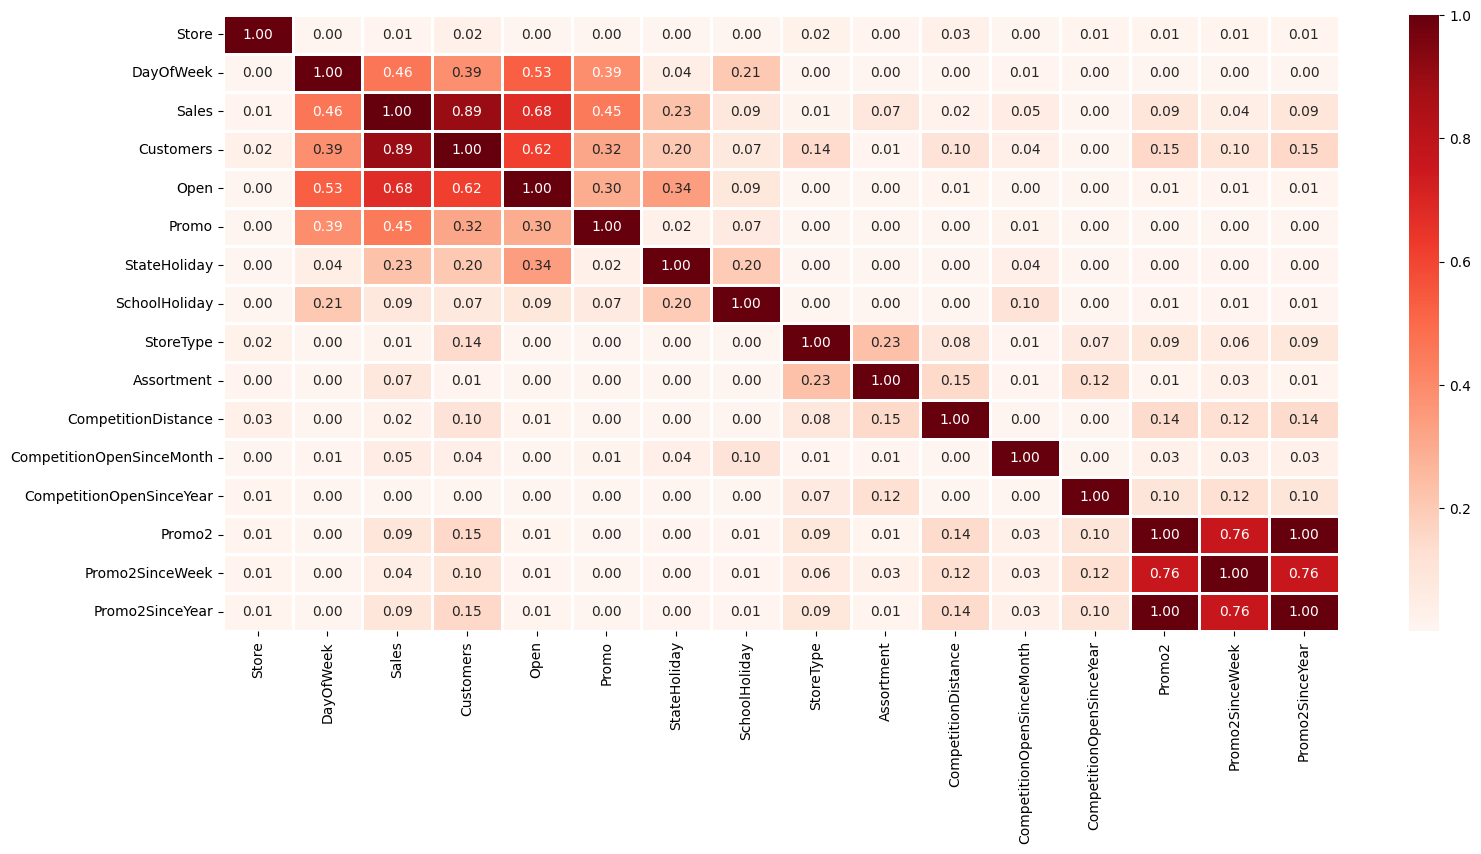

In [34]:
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

**The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.**

In [35]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


<ipython-input-36-c9d5275d8c19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final1.corr()[['Sales']].sort_values(by='Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')


<Axes: >

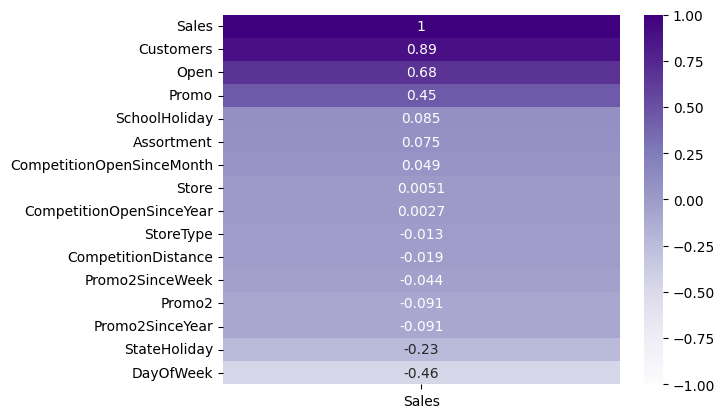

In [36]:
### Heatmap
sns.heatmap(final1.corr()[['Sales']].sort_values(by='Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')

# **Analysis of Target Variable i.e 'Sales'.**

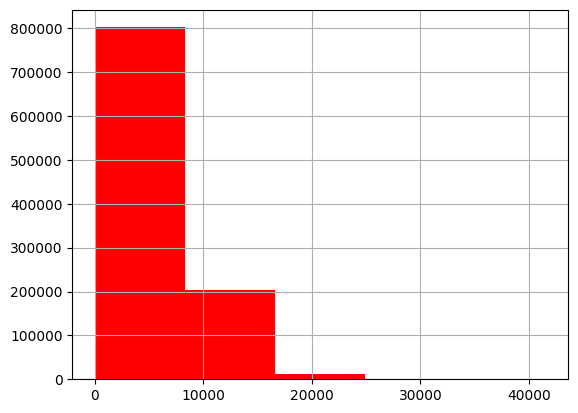

In [37]:
pd.Series(final1['Sales'],).hist(bins=5, color="red")
plt.show()

In [38]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817


**So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.**

In [39]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [40]:
new_df.shape

(844392, 18)

In [41]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0



**In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [42]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])


In [43]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [44]:
new_df.to_csv('cleandata.csv', index=False)

In [45]:
final1.to_csv('cleandata1.csv', index=False)

**MODEL TRAINING**

In [46]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [47]:
#List of Independent Variable
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [48]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [50]:
sc=StandardScaler()

In [51]:
x=sc.fit_transform(X)

In [52]:
x

array([[-1.73257058,  0.8584143 , -0.51773228, ..., -0.36236153,
        -0.63457765, -0.32500153],
       [-1.7294624 ,  0.8584143 , -0.34326764, ..., -0.36236153,
         1.57585129, -0.32500153],
       [-1.72635422,  0.8584143 ,  0.14523335, ..., -0.36236153,
         1.57585129, -0.32500153],
       ...,
       [ 0.6545114 , -0.88203968,  1.20946765, ..., -0.36236153,
         1.57585129, -0.32500153],
       [ 1.21087556, -0.88203968,  0.68856608, ..., -0.36236153,
        -0.63457765, -0.32500153],
       [ 1.67399433, -0.88203968,  1.60076691, ..., -0.36236153,
        -0.63457765, -0.32500153]])

**CROSS VALIDATION**

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
from sklearn.model_selection import cross_val_score
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()

}

In [72]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 1515.855016202931
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 1515.7945464229172
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 1515.828441850008
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 1080.5632469815293
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 2270.951939319144
****************************************************************************************************


In [73]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


**MODEL BUILDING**

In [74]:
GRB=GradientBoostingRegressor()

In [75]:
GRB.fit(X_train,y_train)

GradientBoostingRegressor()

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

In [79]:
print("model trained with {}".format(GRB))
training_score = GRB.score(X_train, y_train)*100
testing_score = GRB.score(X_test, y_test)*100
score = r2_score(y_test, GRB.predict(X_test))*100
mae = mean_absolute_error(y_test, GRB.predict(X_test))
mse = mean_squared_error(y_test, GRB.predict(X_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with GradientBoostingRegressor()
r2score:  88.0073327023629
training_score:  88.04736519804456
testing_score:  88.0073327023629
mae:  781.010297381519
mse:  1148720.6340644078
rmse_test:  1071.7838560383375


**EVALUATION**

In [80]:
y_pred = GRB.predict(X)

In [81]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,5263.0,5093.210158
1,6064.0,5415.222983
2,8314.0,8186.036820
3,13995.0,11915.424587
4,4822.0,5324.610478
...,...,...
844387,3375.0,3644.890401
844388,10765.0,11693.944052
844389,5035.0,7005.602814
844390,4491.0,5902.239214


**Visualizing the Prediction**

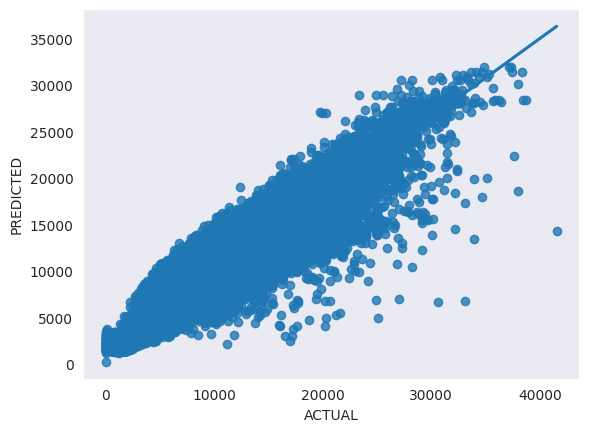

In [101]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTED')
plt.show()

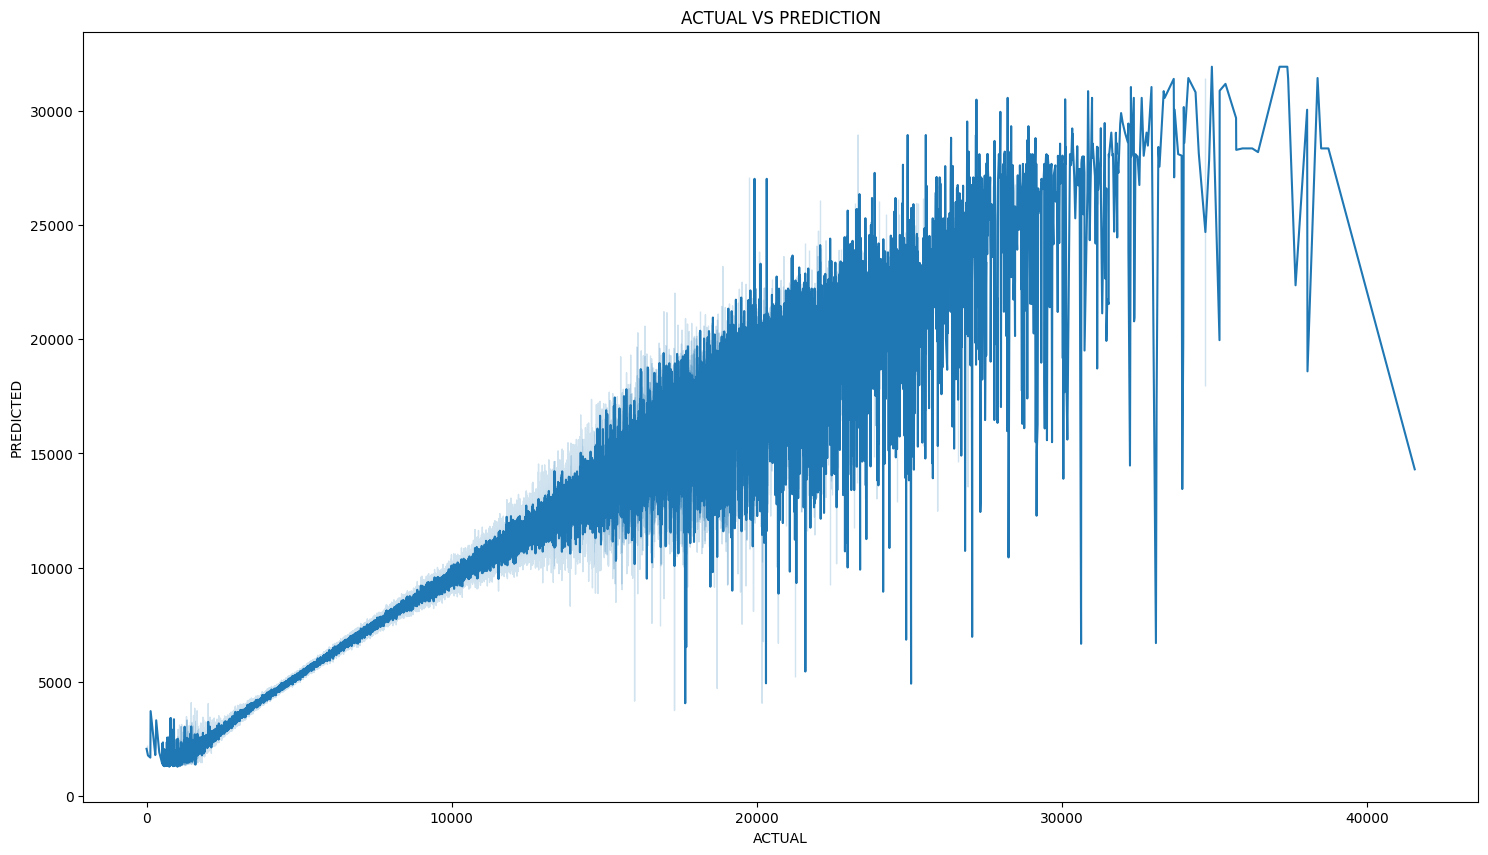

In [82]:
#Lineplot
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

In [99]:
import pickle
pickle.dump(final1,open('final1.pkl','wb'))
pickle.dump(GradientBoostingRegressor,open('GradientBoostingRegressor.pkl','wb'))

***The model is successfully created and ready for deployment on a live server for a real user interaction.***